In [2]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression, f_classif
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import SGDClassifier, LassoCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.kernel_approximation import Nystroem
from sklearn.neural_network import MLPClassifier
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import make_pipeline as make_imb_pipeline
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import EditedNearestNeighbours, CondensedNearestNeighbour
# from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('c:/1/bank.csv')
df.head(4)

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0


https://www.kaggle.com/chiranjeevbit/bank-data-analysis

https://www.kaggle.com/shari1/bank-marketing-term-deposit-prediction-starter/notebook

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

opis danych

# Dane klienta banku

1 - age (numerycznie)

2 - job: rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)

3 - marital: stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)

4 - education (kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)

5 - default: czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)

6 - housing: ma kredyt mieszkaniowy?
(kategorycznie: „nie”, „tak”, „nieznany”) 

7 - loan: czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)

# Powiązane z ostatnim kontaktem bieżącej kampanii

8 - contact: typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

9 - month: ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

10 - day_of_week: ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

11 - duration: czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.

# Inne atrybuty

12 - campaign: liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

13 - pdays: liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

14 - previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

15 - poutcome: wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)

# Atrybuty kontekstu społecznego i gospodarczego

16 - emp.var.rate: wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

17 - Cons.price.idx: wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

18 - cons.conf.idx: wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

19 - euribor3 mln: stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

20 - nr_employed: liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

# TERAZ ROBIE TEN PROJEKT

https://anujkatiyal.com/blog/2017/10/01/aml-kaggle/#.XYhpNSgzY2w

# Krok pierwszy: sprawdzam kompletność danych

In [2]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Dane są kompletne teraz sprawdzam typ danych

In [3]:
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Analiza statystyczna dla danych numerycznych

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20593.50000,20593.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,11890.09578,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.00000,0.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,10296.75000,10296.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,20593.50000,20593.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,30890.25000,30890.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,41187.00000,41187.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


wiersze i kolumny

In [5]:
df.shape

(41188, 23)

Analiza statystyczna dla danych nie numerycznych

In [6]:
df.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


# Krok 2: Visualizing Distribution of Continuous Variables

Kasuje niepotrzebne kolumny

In [7]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

Dzielimy dane na ciągłe i dyskretne

In [8]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [9]:
continuous_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [10]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [11]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


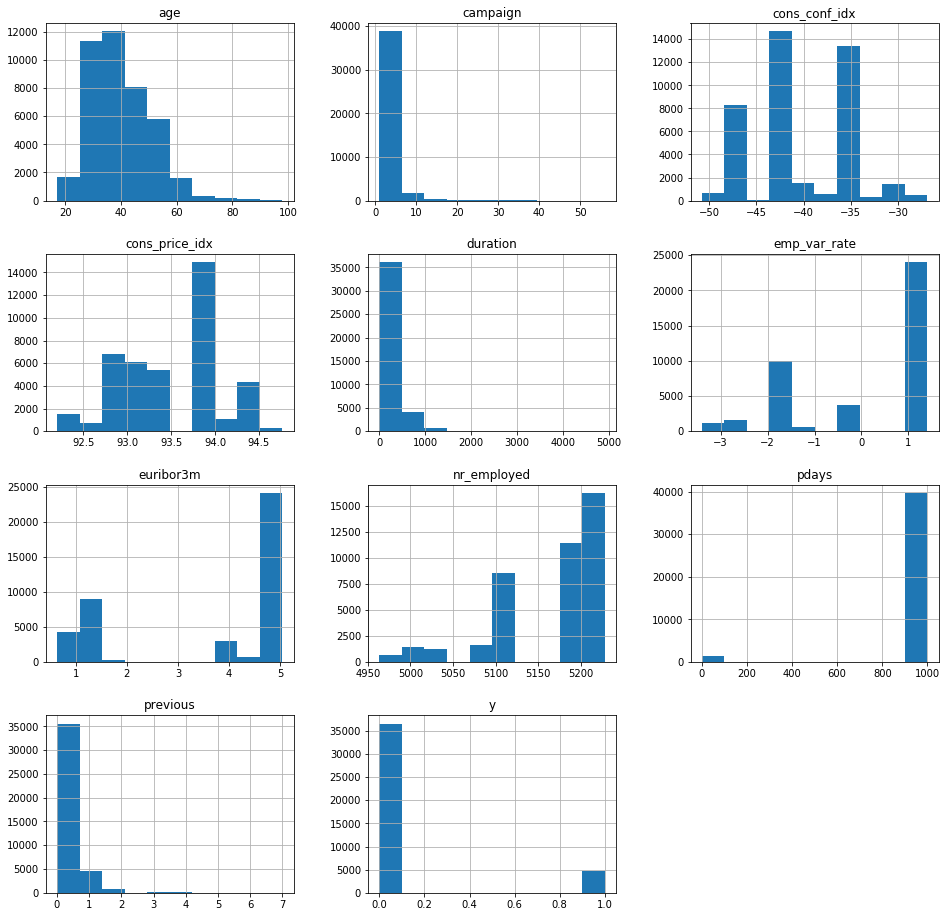

In [12]:
_ = df.hist(column=continuous_vars, figsize = (16,16))

# Krok 3: Visualizing Distribution of Categorical Variables

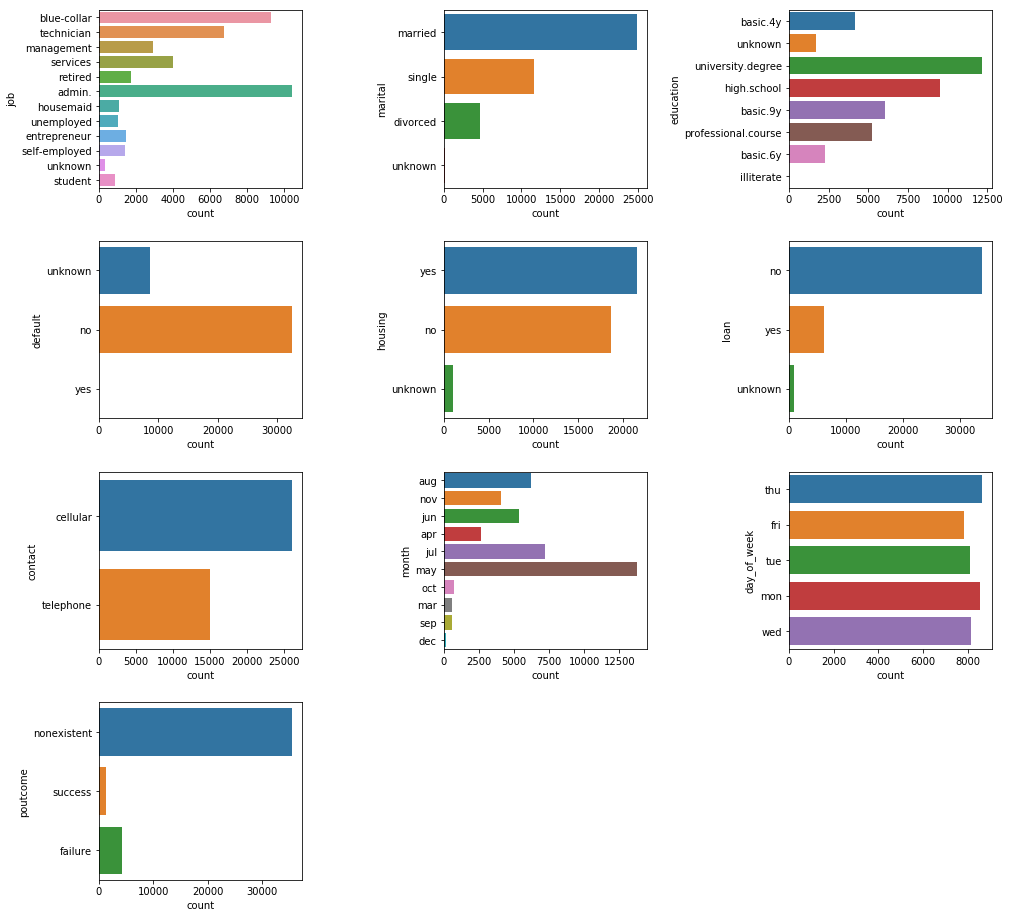

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
# robie przestrzeń między wykresami 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
# pętla: mamy 9 zmiennych dyskretnych, dalej nie wiem jak to działa ale jest super 
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

# Scatter Plot Matrix for checking Correlations (takes long to build on travis, commented)

# Preparation
1. Creating dummy variables for categorical variables
2. Scaling numerical variables
3. Removing variables based on variance

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [15]:
df2 = df[continuous_vars]
df2.head(4)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0


# CYFRYZACJA WARTOŚCI TEKSTOWYCH

Cyfruzyje wszystkie napisy i nazwy, czyli podmieniam zamiast wyrazów cyfry wszędzie tam gdzie jest to potrzebne.
Taka jest konstrukcja poniższego kodu.

In [16]:
data_dummies_df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)
data_dummies_df.head(3)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1


In [50]:
data_dummies_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

Otwieram poboczną, inną bazę danych:
    https://github.com/anujk3/ml_datasets/tree/master/aml-kaggle

In [17]:
holdout_df = pd.read_csv('c:/1/holdout.csv')

In [18]:
holdout_df.head(4)

,ID,age,job,marital_status,education,credit_default,housing,loan,contact,month,...,duration,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,2866,47.0,admin.,divorced,university.degree,unknown,no,no,telephone,may,...,239.0,2.0,999,0,nonexistent,1.247123,92.972198,-35.612530,4.932103,5190.0
1,1957,40.0,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,...,297.0,5.0,999,0,nonexistent,1.336096,95.085866,-40.841331,5.082825,5225.0
2,768,42.0,technician,married,professional.course,no,yes,no,cellular,jul,...,415.0,3.0,999,0,nonexistent,1.388607,93.705043,-42.039772,4.941916,5232.0
3,4510,53.0,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,...,386.0,1.0,999,0,nonexistent,1.146340,92.826786,-36.824117,4.916084,5205.0


In [19]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0


Nie wiem po co on otwiera inną (bo ma niekture nazwy kolumn inne) baze danych: holdout.csv

Teraz usuwa jedną z kolumn w bazie holdout_df a mianowicie: 'duration'

In [20]:
holdout_df.drop("duration", axis=1, inplace=True)

In [21]:
#holdout_dummies_df = pd.get_dummies(holdout_df, columns=categorical_vars, drop_first=True)

In [22]:
holdout_df.columns

Index(['ID', 'age', 'job', 'marital_status', 'education', 'credit_default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign',
       'prev_days', 'prev_contacts', 'prev_outcomes', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

Jeszcze przy: pd.get_dummies(holdout_df, columns=categorical_vars, drop_first=True) sie walnął bo nie ma tam takich kolumn jak: ['poutcome', 'marital', 'default'] - zaczyna szaleć
Nie wiem po co to robi ale to dalej nie będzie działało bo w pd.get_dummies jest błąd.

In [23]:
output_df = pd.DataFrame(holdout_df["ID"])
output_df. head(4)
#holdout_dummies_df.drop("ID", axis=1, inplace=True)

,ID
0,2866
1,1957
2,768
3,4510


# Skalowanie standardowe tylko dla wartości dyskretnych

Chodzi o to żeby przekształcić tak baze żeby było tylko zero-jeden dla każdego stanu (stany są pokazane jako kolumny).
Transpozycję macierzy przeprowadza się też przez funkcje: df2 = pd.melt(df, id_vars=['Country Name', 'Country Code',.....

(a) First we build a simple logistic regression model by standardizing all the features using the Standard scaler.

Wychodzi macierz składająca się z kolumn - stanów

In [24]:
categorical_dummies = pd.get_dummies(df[categorical_vars], drop_first=True).columns
categorical_dummies

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Tak wygląda skalowanie standardowe - wychodzi macierz 0-1, kolumny to kolejne stany tu akurat dla zmiennych dyskretnych

In [25]:
pd.get_dummies(df[categorical_vars], drop_first=True).head(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Teraz robi model regresji logistycznej

In [32]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union

Nie wiem co on tu robi - spróbuję POTEM zrobić równanie regresji logistycznej po mojemu, podstawiając dane ze skalowania standardowego. Teraz próbuję zrozumieć co autor miał na myśli

In [34]:
select_categorical = FunctionTransformer(lambda X: X[categorical_dummies],validate = False)
select_categorical

FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x0000019B26C56EA0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=False)

In [35]:
select_continuous = FunctionTransformer(lambda X: X[continuous_vars],validate = False)
select_continuous

FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x0000019B298740D0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=False)

In [37]:
fu = make_union(select_categorical, make_pipeline(select_continuous, StandardScaler()))
fu

FeatureUnion(n_jobs=None,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x0000019B26C56EA0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=False)), ('pipeline', Pipeline(memory=...  validate=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))]))],
       transformer_weights=None)

In [39]:
pipe = make_pipeline(fu, LogisticRegressionCV())
pipe

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=None,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x0000019B26C56EA0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
...    random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

# (b) Logistic Regression with Kernel
Next we use kernelized logistic regression to make our prediction. Again we use standard scaler before fitting our model.

In [53]:
approx = Nystroem(gamma=1./data_dummies_df.shape[1], n_components=300)
approx

Nystroem(coef0=None, degree=None, gamma=0.018518518518518517, kernel='rbf',
     kernel_params=None, n_components=300, random_state=None)

In [54]:
pipe = make_pipeline(StandardScaler(), approx, LogisticRegressionCV())
pipe

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('nystroem', Nystroem(coef0=None, degree=None, gamma=0.018518518518518517, kernel='rbf',
     kernel_params=None, n_components=300, random_state=None)), ('logisticregressioncv', LogisticRegressionCV(Cs=10, class_wei...    random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

# ZAWIESZAM ale materiał jest gigantyczny z zakresu tego co ma byc w tym banku